# DSCI 303 - Project 03

### Kyle Fowler

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

## Part A: Stock Simulation Function

I will create a function named simulate_stock, which will randomly generate a simulated sequence of daily stock prices based on multiple parameters.

In [2]:
def simulate_stock(start, rate, vol, days):
    daily_yields = np.random.normal(loc = rate/252, scale = vol/(252**.5), size = days)
    cumulative_yields = np.cumsum(daily_yields)
    daily_multipliers = np.exp(cumulative_yields)
    simulated_daily_prices = np.round(daily_multipliers * start, 2)
    simulated_daily_prices = np.concatenate(([start], simulated_daily_prices))
    
    return simulated_daily_prices


Now I will test my function created.

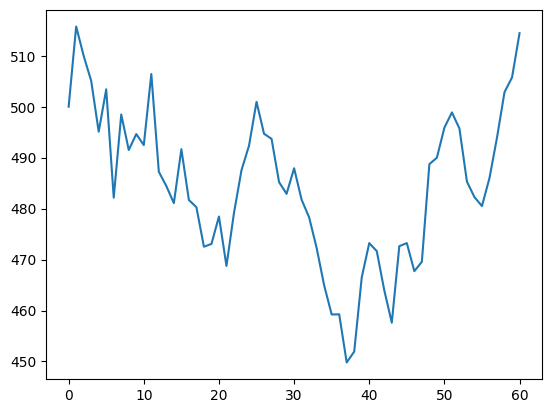

In [3]:
np.random.seed(1)
example = simulate_stock(500, .08, .3, 60)
plt.plot(example)

## Part B: Annual Yield Function

Now we will create a function that takes a simulated run as its input, and calculates the annual yield for that particular run.

In [4]:
def find_yield(run):
    final_price = run[-1]
    beginning_price = run[0]
    days_in_run = len(run) - 1
    annual_yield = math.log(final_price / beginning_price) * (252 / days_in_run)
    return round(annual_yield, 4)


Next I will test my function by running it on the previously simulated run.

In [5]:
find_yield(example)

0.1196

In the next cell, I will explore the potential variability in our simulated runs by creating and plotting 25 simulated runs.

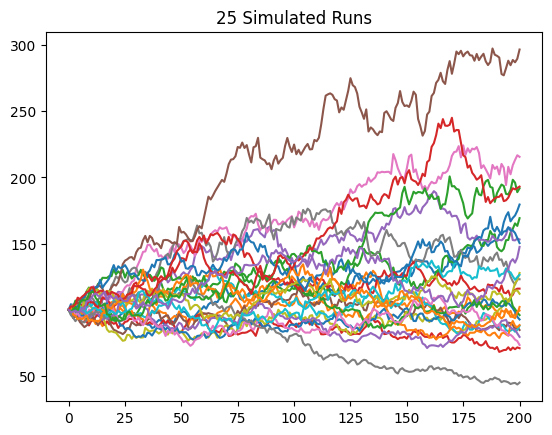

In [6]:
np.random.seed(1)

start = 100
rate = .06
vol = .4
days = 200

fig, axs = plt.subplots(1,1)
annual_yields1 = []
for i in range(25):
    simulated_prices = simulate_stock(start,rate,vol,days)
    annual_yield = np.round(find_yield(simulated_prices),4)
    annual_yields1.append(annual_yield)
    plt.plot(simulated_prices)
plt.title('25 Simulated Runs')

plt.show()


Next, I will show the yields of the 25 simulated runs.

In [7]:
print(annual_yields1)

[0.7375, 0.0266, 0.663, -0.4319, 0.5371, -0.2086, 0.9679, 0.2618, 0.3093, -0.1628, -0.0956, -0.1546, -0.0517, 0.1869, -0.2887, 1.3704, -0.3891, -1.0067, 0.1443, 0.2954, 0.5144, -0.0072, 0.8206, 0.8291, 0.4901]


## Part C: Finding Seeds that Generate Specific Outcomes

Through trial & error, I will find seeds that result in specific outcomes.

In the cell below, Stock A has the highest simulated final price.

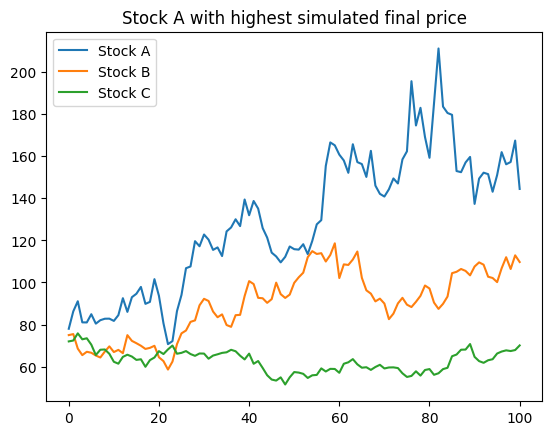

In [8]:
days = 100

a_start = 78
a_vol = 1.2
a_rate = 0.04

b_start = 75
b_vol = 0.8
b_rate = 0.08

c_start = 72
c_vol = 0.6
c_rate = 0.16

np.random.seed(10)
fig, axs = plt.subplots(1,1)
a_simulated_prices = simulate_stock(a_start,a_rate,a_vol,days)
plt.plot(a_simulated_prices, label ='Stock A')

b_simulated_prices = simulate_stock(b_start,b_rate,b_vol,days)
plt.plot(b_simulated_prices, label ='Stock B')

c_simulated_prices = simulate_stock(c_start,c_rate,c_vol,days)
plt.plot(c_simulated_prices, label ='Stock C')

plt.legend()

plt.title('Stock A with highest simulated final price')

plt.show()


In the cell below, Stock B has the highest simulated final price.

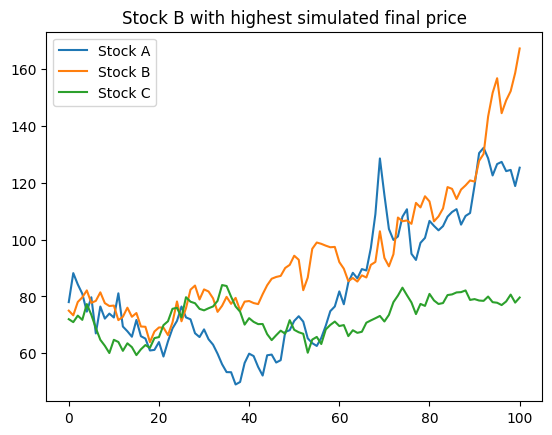

In [9]:
days = 100

a_start = 78
a_vol = 1.2
a_rate = 0.04

b_start = 75
b_vol = 0.8
b_rate = 0.08

c_start = 72
c_vol = 0.6
c_rate = 0.16

np.random.seed(1)
fig, axs = plt.subplots(1,1)
a_simulated_prices = simulate_stock(a_start,a_rate,a_vol,days)
plt.plot(a_simulated_prices, label ='Stock A')

b_simulated_prices = simulate_stock(b_start,b_rate,b_vol,days)
plt.plot(b_simulated_prices, label ='Stock B')

c_simulated_prices = simulate_stock(c_start,c_rate,c_vol,days)
plt.plot(c_simulated_prices, label ='Stock C')

plt.legend()

plt.title('Stock B with highest simulated final price')

plt.show()


In the cell below, Stock C has the highest simulated final price.

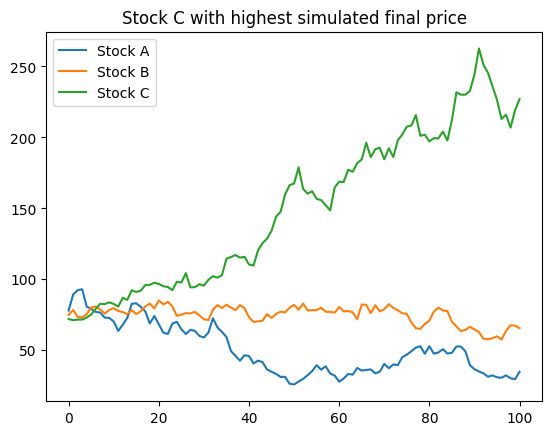

In [10]:
days = 100

a_start = 78
a_vol = 1.2
a_rate = 0.04

b_start = 75
b_vol = 0.8
b_rate = 0.08

c_start = 72
c_vol = 0.6
c_rate = 0.16

np.random.seed(3)
fig, axs = plt.subplots(1,1)
a_simulated_prices = simulate_stock(a_start,a_rate,a_vol,days)
plt.plot(a_simulated_prices, label ='Stock A')

b_simulated_prices = simulate_stock(b_start,b_rate,b_vol,days)
plt.plot(b_simulated_prices, label ='Stock B')

c_simulated_prices = simulate_stock(c_start,c_rate,c_vol,days)
plt.plot(c_simulated_prices, label ='Stock C')

plt.legend()

plt.title('Stock C with highest simulated final price')

plt.show()


## Part D: Monte Carlo Simulation

Next I will perform several simulations to estimate probabilities relating to the outcome of certain events.

In [11]:
def monte_carlo(start, rate, vol, days, num_runs):
    final_prices = []
    annual_yields = []
    
    for _ in range(num_runs):
        run = simulate_stock(start, rate, vol, days)

        final_prices.append(run[-1])
        
        annual_yield = find_yield(run)
        annual_yields.append(annual_yield)
    
    return np.array(final_prices), np.array(annual_yields)

final_prices, annual_yields = monte_carlo(200, 0.10, 0.4, 500, 10000)


Next I will test the fucntion by running a Monte Carlo simulation with a specific seed.

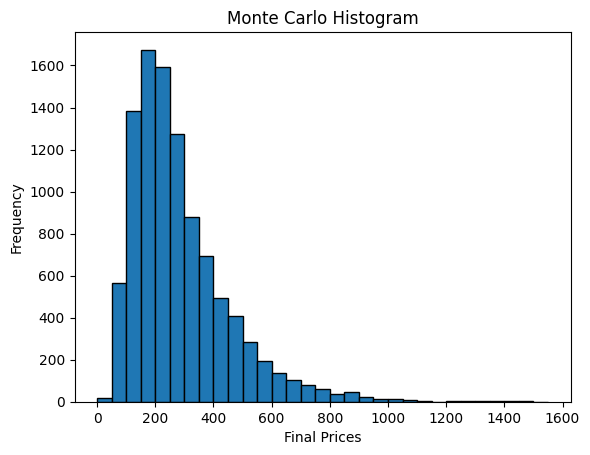

In [12]:
np.random.seed(1)

final_prices, annual_yields = monte_carlo(200, 0.10, 0.4, 500, 10000)
plt.figsize = (10, 5)
plt.hist(final_prices, bins=np.arange(0, 1600, 50), edgecolor = 'black')
plt.xlabel('Final Prices')
plt.ylabel('Frequency')
plt.title('Monte Carlo Histogram')

plt.show()


Now I will display the 10th, 25th, 50th, 75th, and 90th percentiles of the simulated final prices.

In [13]:
percentiles = [10, 25, 50, 75, 90]
for percentile in percentiles:
    value = np.percentile(final_prices, percentile)
    print(f"{percentile}th percentile: {value:.2f}")

10th percentile: 118.05
25th percentile: 165.57
50th percentile: 242.95
75th percentile: 357.56
90th percentile: 505.91


## Part E: Effects of Volatility

Now we will explore the effect of volatility on simulated stock prices. This will be done by performing two Monte Carlo simulations. Each simulation will use different volatilities but with all other parameters the same.

In [20]:
np.random.seed(1)

stock_a_params1 = {'name': 'Stock A', 'price': 100, 'rate': 0.12, 'vol': 0.3, 'runs': 10000, 'days': 150}
stock_b_params1 = {'name': 'Stock B', 'price': 100, 'rate': 0.12, 'vol': 0.7, 'runs': 10000, 'days': 150}

final_prices_a, annual_yields_a = monte_carlo(stock_a_params1['price'], stock_a_params1['rate'],
                                               stock_a_params1['vol'], stock_a_params1['days'], stock_a_params1['runs'])

final_prices_b, annual_yields_b = monte_carlo(stock_b_params1['price'], stock_b_params1['rate'],
                                               stock_b_params1['vol'], stock_b_params1['days'], stock_b_params1['runs'])

avg_yield_a = np.mean(annual_yields_a)
avg_yield_b = np.mean(annual_yields_b)

print(f"Average Annual Yield for {stock_a_params1['name']} over {stock_a_params1['runs']} runs: {avg_yield_a:.4f}")
print(f"Average Annual Yield for {stock_b_params1['name']} over {stock_b_params1['runs']} runs: {avg_yield_b:.4f}")


Average Annual Yield for Stock A over 10000 runs: 0.1218
Average Annual Yield for Stock B over 10000 runs: 0.1128


Next, we will visually inspect the results of the two Monte Carlo simulations by plotting 
histograms of the final prices.

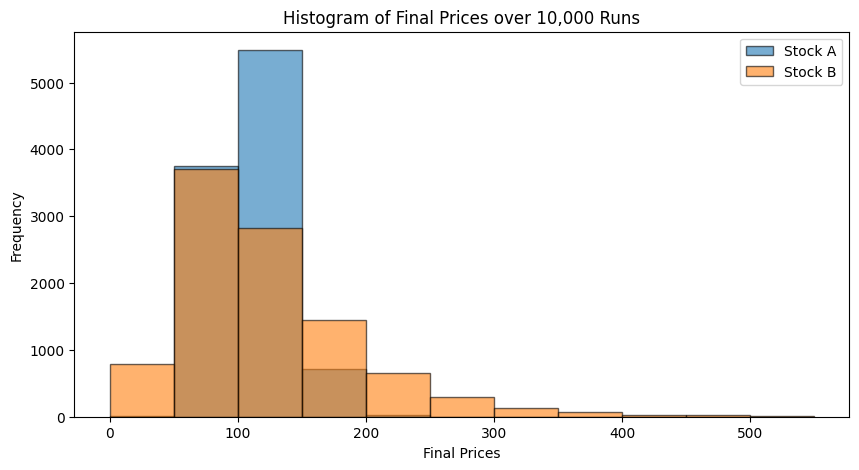

In [18]:
plt.figure(figsize=(10, 5))

plt.hist(final_prices_a, bins=np.arange(0, 600, 50), alpha=0.6, label=stock_a_params['name'], edgecolor='black')
plt.hist(final_prices_b, bins=np.arange(0, 600, 50), alpha=0.6, label=stock_b_params['name'], edgecolor='black')

plt.xlabel('Final Prices')
plt.ylabel('Frequency')
plt.title('Histogram of Final Prices over 10,000 Runs')
plt.legend()
plt.show()

## Part F: Comparing Two Stocks

Now, we will use a Monte Carlo simulation to estimate probabilities relating to the performance of two stocks with 
different parameters. 

In [22]:
np.random.seed(1)

stock_a_params2 = {'name': 'Stock A', 'price': 120, 'rate': 0.08, 'vol': 0.2, 'runs': 10000, 'days': 252}
stock_b_params2 = {'name': 'Stock B', 'price': 120, 'rate': 0.05, 'vol': 0.5, 'runs': 10000, 'days': 252}

final_prices_a, _ = monte_carlo(stock_a_params2['price'], stock_a_params2['rate'],
                                stock_a_params2['vol'], stock_a_params2['days'], stock_a_params2['runs'])

final_prices_b, _ = monte_carlo(stock_b_params2['price'], stock_b_params2['rate'],
                                stock_b_params2['vol'], stock_b_params2['days'], stock_b_params2['runs'])

proportion_a_higher = np.mean(final_prices_a > final_prices_b)
proportion_a_above_150 = np.mean(final_prices_a > 150)
proportion_b_above_150 = np.mean(final_prices_b > 150)
proportion_a_below_100 = np.mean(final_prices_a < 100)
proportion_b_below_100 = np.mean(final_prices_b < 100)

print("Proportions of runs in which...")
print("-------------------------------")
print(f"{stock_a_params2['name']} ends above {stock_b_params2['name']}: {proportion_a_higher:.4f}")
print(' ')
print(f"{stock_a_params2['name']} ends above 150: {proportion_a_above_150:.4f}")
print(f"{stock_b_params2['name']} ends above 150: {proportion_b_above_150:.4f}")
print(' ')
print(f"{stock_a_params2['name']} ends below 100: {proportion_a_below_100:.4f}")
print(f"{stock_b_params2['name']} ends below 100: {proportion_b_below_100:.4f}")

Proportions of runs in which...
-------------------------------
Stock A ends above Stock B: 0.5206
 
Stock A ends above 150: 0.2338
Stock B ends above 150: 0.3619
 
Stock A ends below 100: 0.0950
Stock B ends below 100: 0.3195


## Part G: Expected Call Payout

Now we will calculate the expected payout of a 'Call' Option in stock investments.

In [25]:
np.random.seed(1)

stock_params3 = {'price': 200, 'rate': 0.11, 'vol': 0.4, 'days': 150, 'runs': 10000}
call_params3 = {'strike_price': 225}

final_prices, _ = monte_carlo(stock_params3['price'], stock_params3['rate'],
                               stock_params3['vol'], stock_params3['days'], stock_params3['runs'])

call_payoffs = np.where(final_prices > call_params3['strike_price'], final_prices - call_params3['strike_price'], 0)

avg_call_payoff = np.mean(call_payoffs)

print(f"Average Call Payoff over {stock_params['runs']} runs: {avg_call_payoff:.4f}")

Average Call Payoff over 10000 runs: 27.0977
